## Lectura fitxer

In [2]:
import pandas as pd

In [3]:
df_students = pd.read_csv("datasets/Data Carrard.csv")
df_students = df_students.drop('id', axis = 1)

In [4]:
df_categorical = df_students[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_numerical = df_students[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

## Aplicació model

In [5]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_numerical)

# Create a PCA instance: pca
pca = PCA(n_components=0.95)

# Fit the PCA instance to the scaled samples
pca.fit(df_num_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(df_num_scaled)

# Print the shape of pca_features
print("The shape of the pca is : ", pca_features.shape)

The shape of the pca is :  (886, 10)


In [7]:
n_clusters = 3  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, random_state=42)
clusters = model_sc.fit_predict(pca_features)

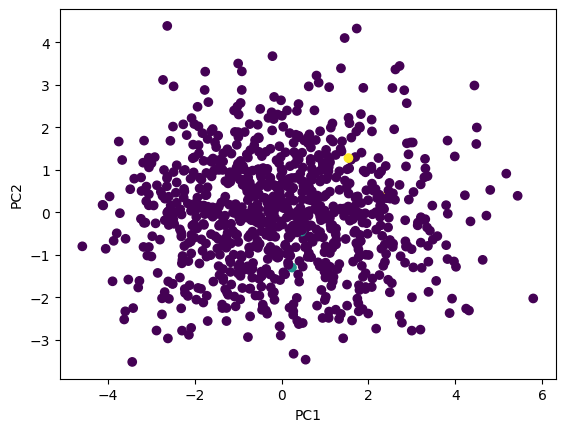

In [8]:
# scatter plot of the first two principal components
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [10]:
# Agregar las etiquetas de clusters al DataFrame original
df_clustered = df_numerical.copy()
df_clustered['Cluster'] = clusters

In [12]:
df_clustered.head(5)

,age,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,Cluster
0,18,88,62,27,17,0.738095,34,61,17,13,20,0
1,26,109,55,37,22,0.690476,7,33,14,11,26,0
2,21,106,64,39,17,0.690476,25,73,24,7,23,0
3,21,101,52,33,18,0.833333,17,48,16,10,21,0
4,21,102,58,28,21,0.690476,14,46,22,14,23,0


In [13]:
# Calcular las propiedades de cada cluster (media de las variables)
cluster_grouped = df_clustered.groupby('Cluster')
cluster_properties = cluster_grouped.mean()

# Imprimir las propiedades de cada cluster
print(cluster_properties)

               age        jspe   qcae_cog   qcae_aff       amsp  erec_mean  \
Cluster                                                                      
0        22.328798  106.386621  58.518141  34.789116  23.173469   0.720791   
1        38.000000  102.500000  66.500000  38.000000  19.500000   0.535714   
2        31.000000  105.000000  54.000000  29.500000  16.500000   0.619048   

              cesd   stai_t     mbi_ex     mbi_cy     mbi_ea  
Cluster                                                       
0        17.971655  42.8322  16.871882  10.073696  24.207483  
1        29.500000  50.5000  16.500000   8.000000  22.000000  
2        41.500000  64.5000  20.000000  14.500000  26.500000  


In [14]:
# Imprimir el número de elementos en cada cluster
print("Número de elementos en cada cluster:")
print(cluster_grouped.size())

Número de elementos en cada cluster:
Cluster
0    882
1      2
2      2
dtype: int64


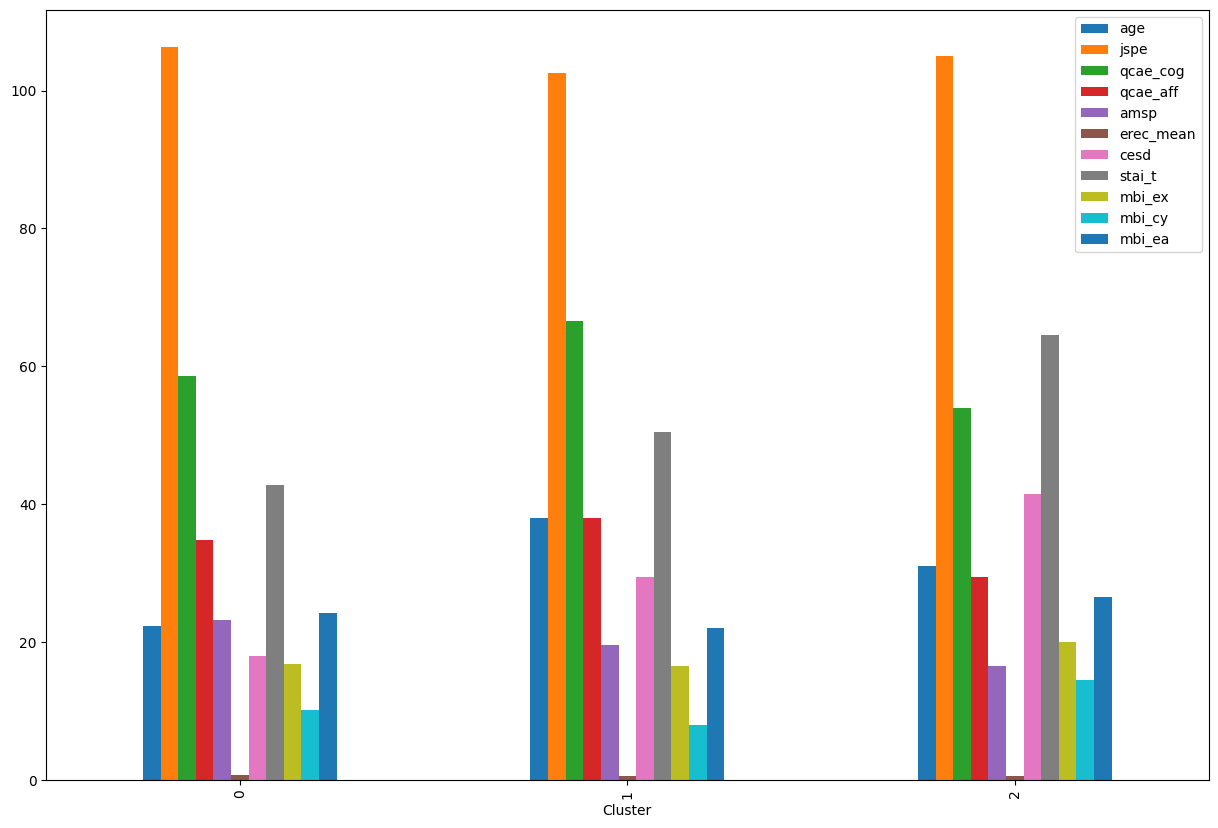

In [15]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

## Machine Leraning

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, clusters, test_size=0.2, random_state=42)

# Create a logistic regression classifier
logreg = LogisticRegression(random_state=42)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9887640449438202


## Avaluació Model

In [1]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176   1   0]
 [  0   0   0]
 [  1   0   0]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       177
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1

    accuracy                           0.99       178
   macro avg       0.33      0.33      0.33       178
weighted avg       0.99      0.99      0.99       178



c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 